## Get Product Dimensions (predetermined bounding boxes)

used makesense.ai to create bounding boxes

In [1]:
pip install ultralytics opencv-python numpy torch torchvision torchaudio

  Using cached opencv_python-4.11.0.86-cp37-abi3-macosx_13_0_arm64.whl.metadata (20 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
  Using cached charset_normalizer-3.4.1-cp310-cp310-macosx_10_9_universal2.whl.metadata (35 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.1.31-py3-none-any.whl.metadata (2.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.9/921.9 kB 14.1 MB/s eta 0:00:00
Using cached opencv_python-4.11.0.86-cp37-abi3-macosx_13_0_arm64.whl (37.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 20.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 M

In [1]:
pip install opencv-python-headless


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 38.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#check image shape
import os
import cv2

#path to images folder
image_folder = "images/train"

#dimensions of the first few images
for img_name in os.listdir(image_folder):
    img_path = os.path.join(image_folder, img_name)
    img = cv2.imread(img_path)
    
    if img is not None:
        h, w, _ = img.shape
        print(f"Image: {img_name} → Width: {w}, Height: {h}")
    else:
        print(f"Could not open {img_name}")

    #check a few images
    if img_name.endswith(".jpg") or img_name.endswith(".png"):
        break


Image: IMG_4670.jpeg → Width: 3024, Height: 4032
Image: IMG_4666.jpeg → Width: 3024, Height: 4032
Image: IMG_4674.png → Width: 4032, Height: 3024


Image: images/train/IMG_4670.jpeg
Product width: 3.2 inches
Product height: 8.4 inches


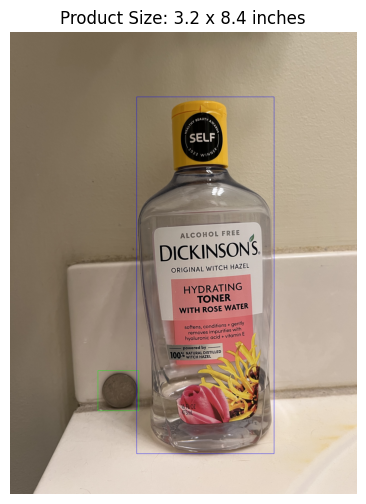

Image: images/train/IMG_4666.jpeg
Product width: 3.3 inches
Product height: 9.7 inches


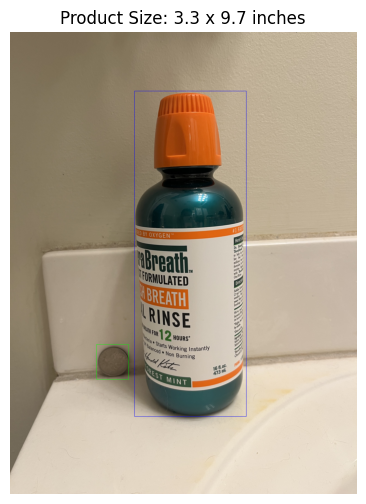

Image: images/train/IMG_4667.jpeg
Product width: 2.8 inches
Product height: 10.1 inches


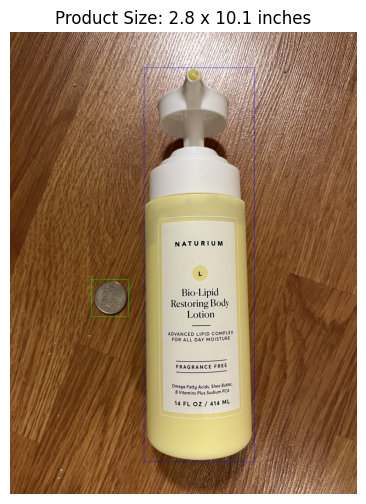

Image: images/train/IMG_4671.jpeg
Product width: 3.0 inches
Product height: 6.3 inches


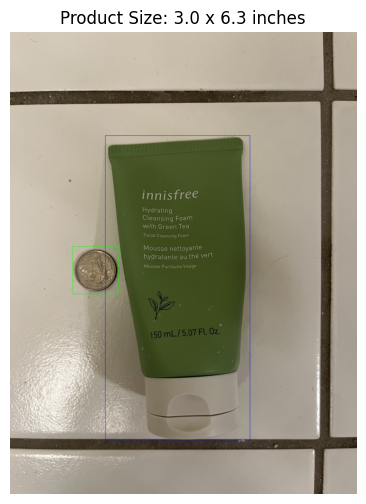

Image: images/train/IMG_6444.jpeg
Product width: 2.1 inches
Product height: 3.2 inches


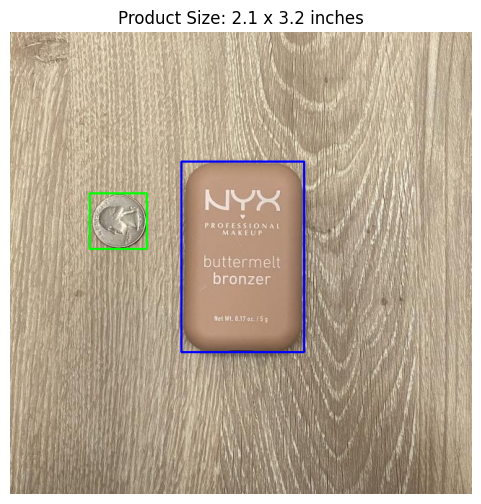

Image: images/train/IMG_4668.jpeg
Product width: 1.2 inches
Product height: 4.0 inches


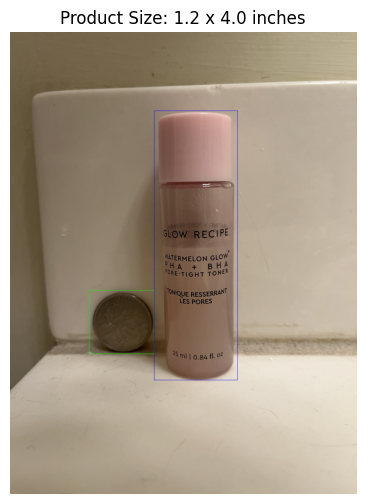

Image: images/train/IMG_4673.jpeg
Product width: 2.8 inches
Product height: 2.8 inches


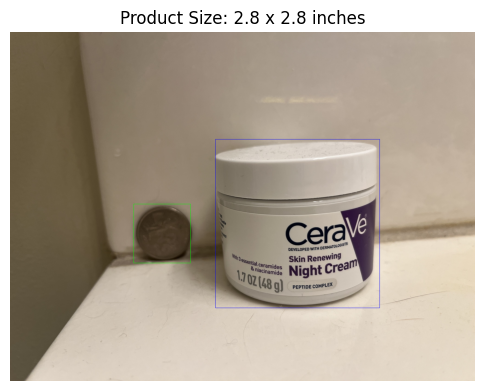

Image: images/train/IMG_4674.png
Product width: 29.1 inches
Product height: 13.5 inches


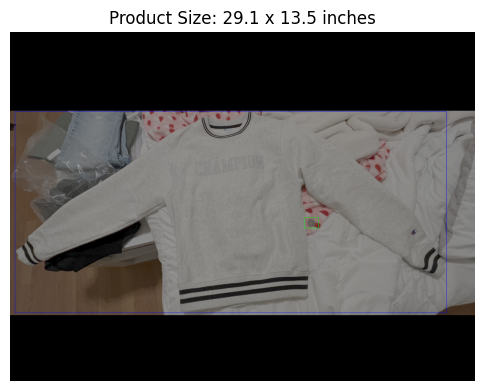

In [ ]:
#get dimensions

import cv2
import matplotlib.pyplot as plt
import os
import glob

#set directories for images and labels
image_dir = 'images/train/'  # path to images
label_dir = 'labels/train/'  # path to YOLO annotation files

#get all image file paths
image_paths = glob.glob(os.path.join(image_dir, '*.jpeg')) + glob.glob(os.path.join(image_dir, '*.jpg')) + glob.glob(os.path.join(image_dir,'*.png'))

#reference object size in inches (U.S. quarter)
quarter_diameter = 0.955 

#process each image
for image_path in image_paths:
    #load image
    image = cv2.imread(image_path)
    height, width, _ = image.shape  #get image dimensions

    #find corresponding annotation file (same name but .txt)
    base_filename = os.path.splitext(os.path.basename(image_path))[0]
    annotation_file = os.path.join(label_dir, f"{base_filename}.txt")

    if not os.path.exists(annotation_file):
        print(f"Skipping {image_path}: No corresponding annotation file.")
        continue

    annotations = []

    #read YOLOv8 annotations
    with open(annotation_file, 'r') as f:
        for line in f.readlines():
            values = line.strip().split()
            class_id = int(values[0])  #class ID
            x_center = float(values[1]) * width
            y_center = float(values[2]) * height
            box_width = float(values[3]) * width
            box_height = float(values[4]) * height

            #convert to top-left corner format (x_min, y_min, width, height)
            x_min = int(x_center - box_width / 2)
            y_min = int(y_center - box_height / 2)
            box_width = int(box_width)  #convert width to int
            box_height = int(box_height)  #convert height to int

            annotations.append({'class_id': class_id, 'bbox': [x_min, y_min, box_width, box_height]})

    #define reference object (assuming first annotation is the reference)
    reference_bbox = annotations[0]['bbox']  
    product_bbox = annotations[1]['bbox']  

    #compute pixels per inch using the reference object
    quarter_width_pixels = reference_bbox[2]  # Width in pixels
    pixels_per_inch = quarter_width_pixels / quarter_diameter  # Pixels per inch

    #convert product dimensions from pixels to inches
    product_width_pixels = product_bbox[2]
    product_height_pixels = product_bbox[3]

    product_width_inches = product_width_pixels / pixels_per_inch
    product_height_inches = product_height_pixels / pixels_per_inch

    print(f"Image: {image_path}")
    print(f"Product width: {product_width_inches:.1f} inches")
    print(f"Product height: {product_height_inches:.1f} inches")

    #draw bounding boxes
    cv2.rectangle(image, (reference_bbox[0], reference_bbox[1]),
                  (reference_bbox[0] + reference_bbox[2], reference_bbox[1] + reference_bbox[3]),
                  (0, 255, 0), 2)  #green for reference object

    cv2.rectangle(image, (product_bbox[0], product_bbox[1]),
                  (product_bbox[0] + product_bbox[2], product_bbox[1] + product_bbox[3]),
                  (255, 0, 0), 2)  #blue for product

    #convert BGR (OpenCV format) to RGB (matplotlib format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    #display image
    plt.figure(figsize=(6, 6))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title(f"Product Size: {product_width_inches:.1f} x {product_height_inches:.1f} inches")
    plt.show()




## remove background

In [ ]:
!pip install rembg opencv-python numpy pillow


In [1]:
pip install --upgrade onnxruntime rembg


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 49.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#pip install onnxruntime

#for MAC silicon M1/M2/M3
#pip install onnxruntime-silicon


  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached humanfriendly-10.0-py2.py3-none-any.whl.metadata (9.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 30.4 MB/s eta 0:00:00a 0:00:01
Using cached flatbuffers-25.2.10-py2.py3-none-any.whl (30 kB)
Using cached humanfriendly-10.0-py2.py3-none-any.whl (86 kB)
Note: you may need to restart the kernel to use updated packages.


### to test one image (remove background)

In [ ]:
from rembg import remove
import cv2
import numpy as np
from PIL import Image

#load the image
#input_path = "images/train/IMG_4667.jpeg"
#output_path = "cropped images/output.png"

#read image with OpenCV
#image = cv2.imread(input_path)

#convert OpenCV image to PIL Image format
#image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

#remove background
#output_image = remove(image_pil)

#convert PIL Image back to OpenCV format
#output_np = np.array(output_image)

#save the output image
#cv2.imwrite(output_path, cv2.cvtColor(output_np, cv2.COLOR_RGB2BGR))

#print(f"Background removed! Saved as {output_path}")



Background removed! Saved as cropped images/output.png


### all images in folder

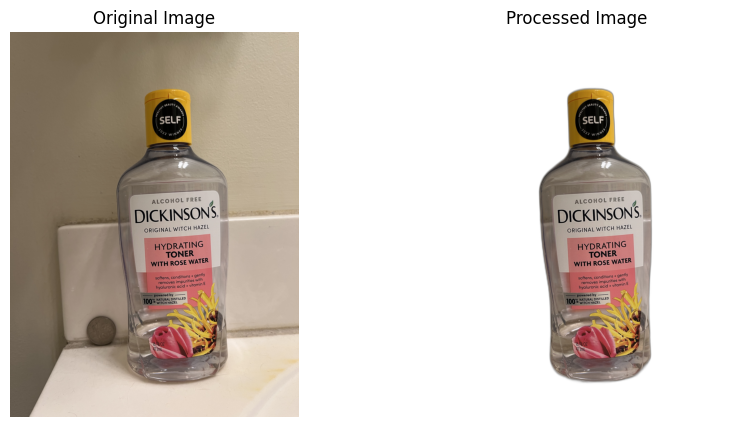

Processed: IMG_4670.jpeg → cropped images/IMG_4670.jpeg


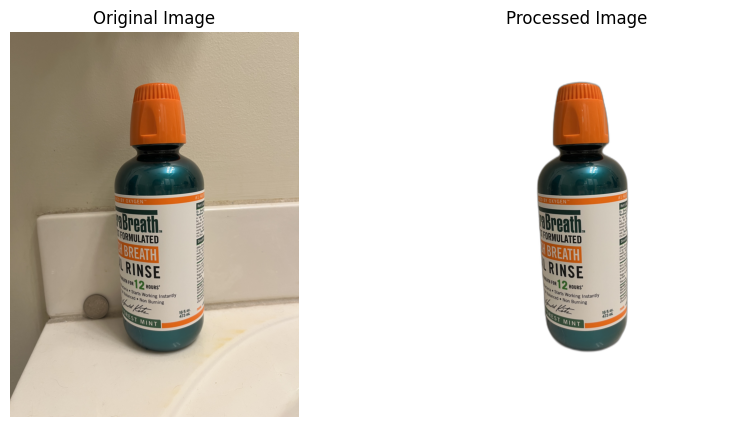

Processed: IMG_4666.jpeg → cropped images/IMG_4666.jpeg


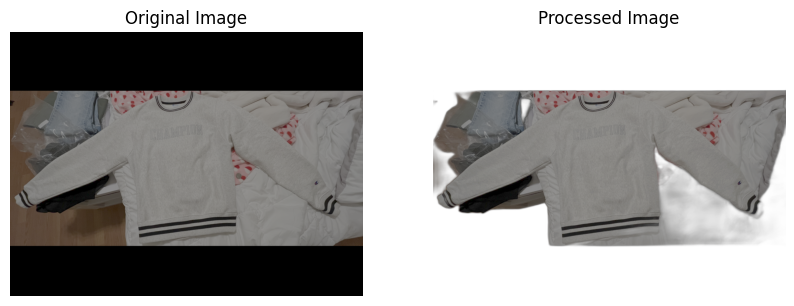

Processed: IMG_4674.png → cropped images/IMG_4674.png


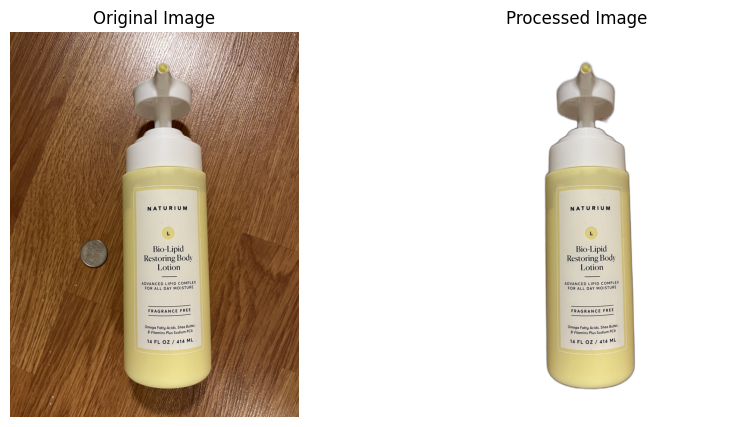

Processed: IMG_4667.jpeg → cropped images/IMG_4667.jpeg


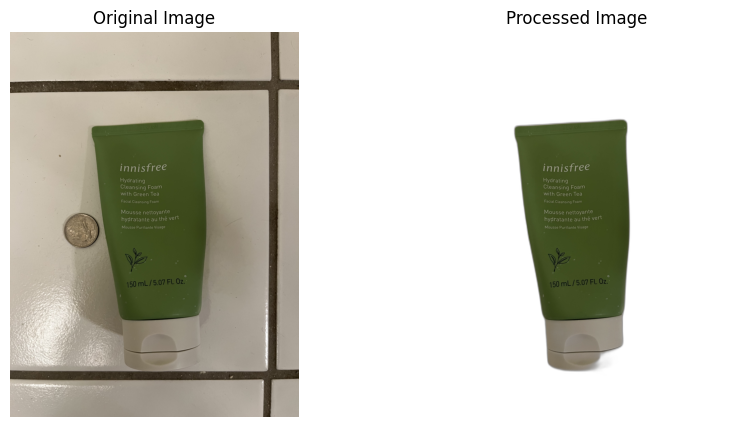

Processed: IMG_4671.jpeg → cropped images/IMG_4671.jpeg


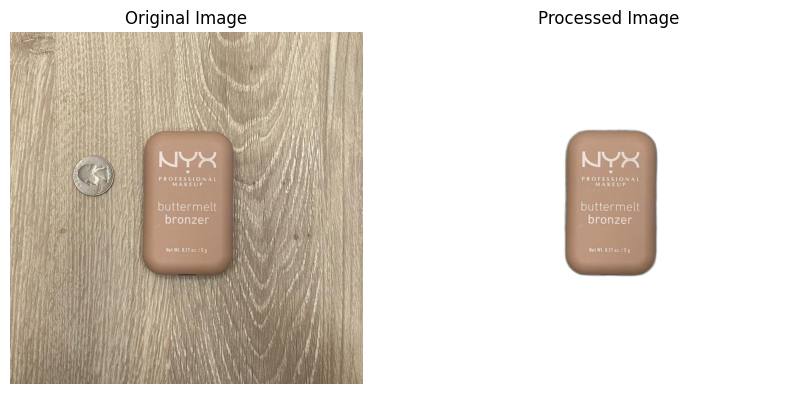

Processed: IMG_6444.jpeg → cropped images/IMG_6444.jpeg


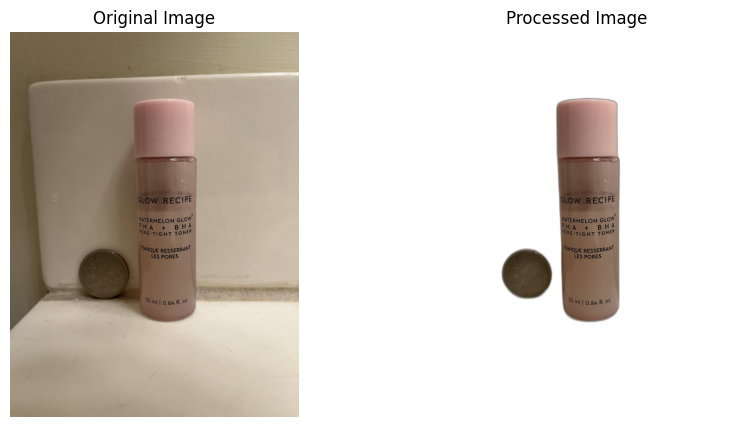

Processed: IMG_4668.jpeg → cropped images/IMG_4668.jpeg


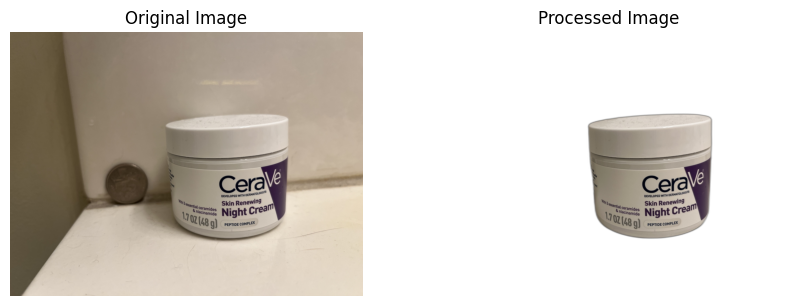

Processed: IMG_4673.jpeg → cropped images/IMG_4673.jpeg


In [4]:
import os
import cv2
import numpy as np
from rembg import remove
from PIL import Image
import matplotlib.pyplot as plt

#paths for input and output directories
input_folder = "images/train"
output_folder = "cropped images"

#process all images in the input folder
for filename in os.listdir(input_folder):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)

        #read image with OpenCV
        image = cv2.imread(input_path)
        if image is None:
            print(f"Error loading {input_path}. Skipping...")
            continue

        #convert OpenCV image to PIL Image format
        image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        #remove background
        output_image = remove(image_pil)
        
        #for transparent background (PNG format recommended)
        output_image.save(output_path, format="PNG")

        #for white background
        # white_bg = Image.new("RGBA", output_image.size, (255, 255, 255, 255))
        # output_image = Image.alpha_composite(white_bg, output_image).convert("RGB")
        # output_image.save(output_path, format="PNG")

        #convert to OpenCV format for preview
        output_np = np.array(output_image)

        #display input and output images side by side
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))
        ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax[0].set_title("Original Image")
        ax[0].axis("off")

        ax[1].imshow(output_np)
        ax[1].set_title("Processed Image")
        ax[1].axis("off")

        plt.show()

        print(f"Processed: {filename} → {output_path}")


## extract product volume/size/details

In [ ]:
pip install pytesseract


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pytesseract

#set tesseract path for mac
pytesseract.pytesseract.tesseract_cmd = "/opt/homebrew/bin/tesseract"

#test
print(pytesseract.get_tesseract_version())

5.5.0


In [5]:
import re
from PIL import Image

#set path for tesseract (windows)
#pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

def preprocess_image(image_path):
    """Preprocess the image to enhance OCR accuracy."""
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # convert to grayscale
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]  # apply thresholding
    return thresh

def extract_text(image):
    """Extract text from an image using Tesseract OCR."""
    return pytesseract.image_to_string(image)

def extract_product_details(text):
    """Extract product name and size from the extracted text."""
    product_name = None
    size = None

    #extract product name (first line or uppercase words)
    lines = text.strip().split("\n")
    if lines:
        product_name = lines[0].strip()  #assume first line contains product name
    
    #extract size (e.g., "500ml", "1.5L", "750g")
    size_match = re.search(r"(\d+(?:\.\d+)?\s?(?:ml|L|g|kg|oz|fl oz))", text, re.IGNORECASE)
    if size_match:
        size = size_match.group(0)

    return product_name, size

def main(image_path):
    #preprocess image
    processed_image = preprocess_image(image_path)
    
    #extract text using OCR
    extracted_text = extract_text(processed_image)
    print("Extracted Text:\n", extracted_text)
    
    #extract product details
    product_name, size = extract_product_details(extracted_text)

    print("\nProduct Details:")
    print(f"Product Name: {product_name if product_name else 'Not Found'}")
    print(f"Size: {size if size else 'Not Found'}")

#test
image_path = "images/train/IMG_4667.jpeg"
main(image_path)


Extracted Text:
 NATURIUM

Bio-Lipid
Restoring Body
Lotion

ADVANCED LIPID COMPLEX
FOR ALL DAY MOISTURE

oo

FRAGRANCE FREE
eae

Omega Fatty Acids, Shea Butter
B Vitamins Plus Sodium PC

14 FL Oz / 414 ML



Product Details:
Product Name: NATURIUM
Size: 14 FL Oz


## product descriptions using chatgpt api

In [ ]:
pip install openai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 29.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import cv2
import pytesseract
import openai
import os
from PIL import Image

#set tesseract path (mac/homebrew)
pytesseract.pytesseract.tesseract_cmd = "/opt/homebrew/bin/tesseract" 

#set OpenAI API key
client = openai.OpenAI(api_key="[key]")


def preprocess_image(image_path):
    """Preprocess image for better OCR results."""
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  #convert to grayscale
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]  #thresholding
    return thresh

def extract_text(image):
    """Extract text from an image using Tesseract OCR."""
    return pytesseract.image_to_string(image) 

def get_product_description(text):
    """Use OpenAI API to generate a product description based on extracted text."""
    prompt = f"Extract the key product details and generate the brand, a brief product description(5 words or less) and the size/volume:\n\n{text}"
    
    response = client.chat.completions.create(
        model="gpt-4o",  #use "gpt-3.5-turbo" if needed
        messages=[{"role": "system", "content": "You are an expert product describer."},
                  {"role": "user", "content": prompt}]
    )
    
    return response.choices[0].message.content.strip() 

def main(image_path):
    """Main function to process an image and get product details."""
    processed_image = preprocess_image(image_path)
    extracted_text = extract_text(processed_image)

    #print("Extracted Text:\n", extracted_text)

    if extracted_text.strip():
        product_description = get_product_description(extracted_text)
        print("\nGenerated Product Description:")
        print(product_description)
    else:
        print("\nNo readable text found in the image.")

#test
image_path = "images/train/IMG_4667.jpeg"
main(image_path)


Extracted Text:
 NATURIUM

Bio-Lipid
Restoring Body
Lotion

ADVANCED LIPID COMPLEX
FOR ALL DAY MOISTURE

oo

FRAGRANCE FREE
eae

Omega Fatty Acids, Shea Butter
B Vitamins Plus Sodium PC

14 FL Oz / 414 ML



Generated Product Description:
Brand: Naturium  
Description: Lipid-restoring body lotion  
Size/Volume: 14 FL Oz / 414 ML


## combined output

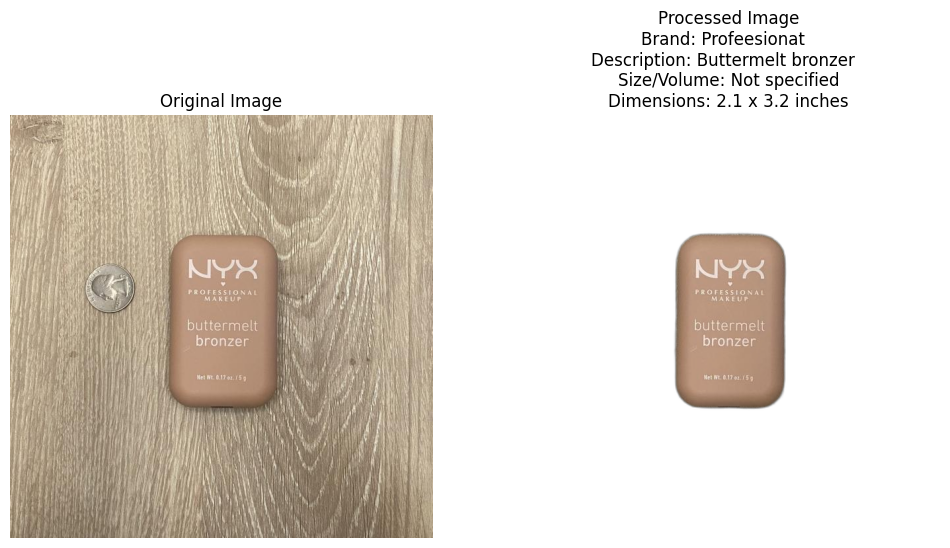

Processed: IMG_6444.jpeg
Brand: Profeesionat  
Description: Buttermelt bronzer  
Size/Volume: Not specified
Dimensions: 2.1 x 3.2 inches
--------------------------------------------------


In [ ]:
import os
import cv2
import numpy as np
import pytesseract
import openai
import matplotlib.pyplot as plt
from rembg import remove
from PIL import Image

#OpenAI API Key
client = openai.OpenAI(api_key="[key]")

#paths for input and output directories
input_folder = "images/train"
label_folder = "labels/train"  #YOLO annotation files for dimensions
output_folder = "cropped_images"
#os.makedirs(output_folder, exist_ok=True)

#reference object size in inches (U.S. quarter)
quarter_diameter = 0.955  

def preprocess_image(image_path):
    """Preprocess the image for OCR."""
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  #convert to grayscale
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]  #thresholding
    return thresh

def extract_text(image):
    """Extract text from an image using Tesseract OCR."""
    return pytesseract.image_to_string(image)

def get_product_description(text):
    """Use OpenAI API to generate structured product details."""
    prompt = f"Extract the key product details and return the brand, a brief description (5 words or less), and the size/volume:\n\n{text}"
    
    response = client.chat.completions.create(
        model="gpt-4o",  # use "gpt-3.5-turbo" if needed
        messages=[{"role": "system", "content": "You are an expert product describer."},
                  {"role": "user", "content": prompt}]
    )
    
    return response.choices[0].message.content.strip()

def get_product_dimensions(image_path):
    """Get product dimensions using YOLO annotation files."""
    image = cv2.imread(image_path)
    height, width, _ = image.shape  #get image dimensions

    #find corresponding YOLO annotation file
    base_filename = os.path.splitext(os.path.basename(image_path))[0]
    annotation_file = os.path.join(label_folder, f"{base_filename}.txt")

    if not os.path.exists(annotation_file):
        print(f"Skipping {image_path}: No corresponding annotation file.")
        return None, None

    annotations = []
    with open(annotation_file, 'r') as f:
        for line in f.readlines():
            values = line.strip().split()
            class_id = int(values[0])  # class ID
            x_center = float(values[1]) * width
            y_center = float(values[2]) * height
            box_width = float(values[3]) * width
            box_height = float(values[4]) * height

            #convert to top-left corner format (x_min, y_min, width, height)
            x_min = int(x_center - box_width / 2)
            y_min = int(y_center - box_height / 2)
            box_width = int(box_width)
            box_height = int(box_height)

            annotations.append({'class_id': class_id, 'bbox': [x_min, y_min, box_width, box_height]})

    if len(annotations) < 2:
        print(f"Skipping {image_path}: Insufficient bounding boxes.")
        return None, None

    #define reference and product bounding boxes
    reference_bbox = annotations[0]['bbox']  
    product_bbox = annotations[1]['bbox']  

    #compute pixels per inch using the reference object
    quarter_width_pixels = reference_bbox[2]
    pixels_per_inch = quarter_width_pixels / quarter_diameter  

    #convert product dimensions from pixels to inches
    product_width_inches = product_bbox[2] / pixels_per_inch
    product_height_inches = product_bbox[3] / pixels_per_inch

    return round(product_width_inches, 1), round(product_height_inches, 1)

def process_image(image_path):
    """Main function to process an image and generate final output."""
    output_path = os.path.join(output_folder, os.path.basename(image_path))

    #load image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading {image_path}. Skipping...")
        return

    #convert OpenCV image to PIL format for background removal
    image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    #remove background
    output_image = remove(image_pil)
    #output_image.save(output_path, format="PNG")  # save with transparent bckgrd

    #convert to OpenCV format
    output_np = np.array(output_image)

    #preprocess for OCR
    processed_image = preprocess_image(image_path)
    extracted_text = extract_text(processed_image)

    #generate product description using OpenAI
    brand, brief_description, size = "Unknown", "Not Found", "N/A"
    if extracted_text.strip():
        product_description = get_product_description(extracted_text)
        details = product_description.split("\n")
        if len(details) >= 3:
            brand, brief_description, size = details[:3]

    #get product dimensions
    product_width, product_height = get_product_dimensions(image_path)

    #display results
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    #show original image
    ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Original Image")
    ax[0].axis("off")

    #show processed image
    ax[1].imshow(output_np)
    ax[1].set_title(f"Processed Image\n{brand}"
                    f"\n{brief_description}"
                    f"\n{size}\n"
                    f"Dimensions: {product_width} x {product_height} inches" if product_width else "Size: Not Found")
    ax[1].axis("off")

    plt.show()

    print(f"Processed: {os.path.basename(image_path)}")
    print(f"{brand}")
    print(f"{brief_description}")
    print(f"{size}")
    print(f"Dimensions: {product_width} x {product_height} inches" if product_width else "Dimensions: Not Found")
    print("-" * 50)

# Process all images in the folder
#for filename in os.listdir(input_folder):
    #if filename.lower().endswith((".jpg", ".jpeg", ".png")):
        #process_image(os.path.join(input_folder, filename))
#test
image_path = "images/train/IMG_6444.jpeg"
process_image(image_path)


## post to facebook marketplace (WIP)

need to create facebook app?
enable Graph API
....

In [ ]:
import requests

ACCESS_TOKEN = "your_facebook_access_token"
PAGE_ID = "your_page_id"

def post_to_facebook(image_path, description):
    """Upload an image and post to a Facebook page."""
    
    #step 1: upload photo to FB
    image_url = "https://graph.facebook.com/v18.0/{}/photos".format(PAGE_ID)
    files = {'source': open(image_path, 'rb')}
    params = {'access_token': ACCESS_TOKEN, 'published': 'false'}

    response = requests.post(image_url, files=files, params=params)
    image_id = response.json().get('id')

    #step 2: create post w/ image
    post_url = "https://graph.facebook.com/v18.0/{}/feed".format(PAGE_ID)
    post_params = {
        'message': description,
        'attached_media': [{'media_fbid': image_id}],
        'access_token': ACCESS_TOKEN
    }

    post_response = requests.post(post_url, json=post_params)
    return post_response.json()

#test
image_path = "cropped_images/IMG_4667.png"
description = "desc..."
response = post_to_facebook(image_path, description)
print("Post Response:", response)

#^uploads the product image to FB
#^posts the product desc on FB business page.
